In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from sympy import Point,Line

In [3]:
data = pd.read_csv('~/DataSet3/1.csv')
data.head()

,0,1502,2215,2153,1
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [4]:
data1=data.iloc[:,1:4]
labels = data.iloc[:,-1]
data1.head()

,1502,2215,2153
0,1667,2072,2047
1,1611,1957,1906
2,1601,1939,1831
3,1643,1965,1879
4,1604,1959,1921


**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [5]:
scaler = StandardScaler()
sample_transformed=scaler.fit_transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow Implimentation with SD Validation Index**

In [6]:
SD_INDEX={}
K = range(9,1,-1)
alpha=0
#Variance of whole data and its Euclidean Norm
sample_variance = pd.DataFrame(sample_transformed,columns=["PC1","PC2","PC3"]).var()
sample_variance_norm = LA.norm(sample_variance,2)
#print("Sample variance ="+str(sample_variance))
for k in K :
    SD_INDEX[k]=0
    sum_inverse_dist=0
    variance_norm=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample_transformed)
    
    centers = kmeansModel.cluster_centers_
    pairwise_center_dist = euclidean_distances(centers)
    #print(pairwise_center_dist)
    
    #Maximum and Minimum distance between cluster centers
    D_max = pairwise_center_dist.max()
    D_min = pairwise_center_dist[np.nonzero(pairwise_center_dist)].min()
    
    sample_transformed1 = kmeansModel.fit_transform(sample_transformed)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample_transformed[labels==i],columns=["PC1","PC2","PC3"])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        
        # Calculating Average Scattering for cluster
        cluster_variance = cluster_datapoints.var()
        #print(cluster_variance)
        
        # Calculating sum of Euclidean Norm or variance measured above for each cluster
        variance_norm += LA.norm(cluster_variance,2)
        #print("variance ="+str(variance_norm))
        
        #Caculating Seperation betwrrn clusters "D"
        sum_inverse_dist = sum_inverse_dist + 1/pairwise_center_dist.sum() 
        
    mean_var_norm=variance_norm/k
    avg_scattering =  mean_var_norm/sample_variance_norm
    print("Avg Scatering ="+str(avg_scattering))
    
    D = (D_max/D_min)*sum_inverse_dist
    print("D = "+str(D))
    
    if(k==9):
        alpha = D
    print("constant = "+str(alpha))
    
    C = (alpha*avg_scattering) + D
    SD_INDEX[k]=C
    print("SD_index = "+str(SD_INDEX))
    print("//")

Avg Scatering =0.8657118982552823
D = 0.4916168733072493
constant = 0.4916168733072493
SD_index = {9: 0.9172154499123947}
//
Avg Scatering =0.951108678741685
D = 0.4923525334625116
constant = 0.4916168733072493
SD_index = {8: 0.9599336082808878, 9: 0.9172154499123947}
//
Avg Scatering =0.40914615182663583
D = 0.48722881308294014
constant = 0.4916168733072493
SD_index = {8: 0.9599336082808878, 9: 0.9172154499123947, 7: 0.6883719649696439}
//
Avg Scatering =0.42721069397169453
D = 0.48982530207236735
constant = 0.4916168733072493
SD_index = {8: 0.9599336082808878, 9: 0.9172154499123947, 6: 0.699849287686152, 7: 0.6883719649696439}
//
Avg Scatering =0.5131458172120247
D = 0.31577401225918267
constant = 0.4916168733072493
SD_index = {8: 0.9599336082808878, 9: 0.9172154499123947, 5: 0.5680451544676515, 6: 0.699849287686152, 7: 0.6883719649696439}
//
Avg Scatering =0.6222527927746508
D = 0.2438641702854991
constant = 0.4916168733072493
SD_index = {4: 0.5497741426760766, 5: 0.5680451544676515

In [7]:
SSE_array=[]
slope=[]
for key,value in SD_INDEX.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.696200065955386, 0.580097348081715, 0.5497741426760766, 0.5680451544676515, 0.699849287686152, 0.6883719649696439, 0.9599336082808878, 0.9172154499123947]


[[2, -0.11610271787367099],
 [3, -0.030323205405638376],
 [4, 0.018271011791574865],
 [5, 0.13180413321850049],
 [6, -0.011477322716508032],
 [7, 0.2715616433112439],
 [8, -0.04271815836849313]]

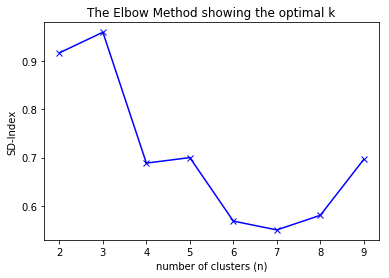

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters (n)')
plt.ylabel('SD-Index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
slope

[[2, -0.11610271787367099],
 [3, -0.030323205405638376],
 [4, 0.018271011791574865],
 [5, 0.13180413321850049],
 [6, -0.011477322716508032],
 [7, 0.2715616433112439],
 [8, -0.04271815836849313]]

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 1
Optimal Number of Clusters = 2
Optimal Number of Clusters = 3
Optimal Number of Clusters = 5


In [11]:
distances=[]
for i in range(0,8):
    p1=Point(2,SSE_array[0])
    p2=Point(9,SSE_array[7])
    l1 = Line(p1,p2)
    p=Point(i+2,SSE_array[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 5
